In [5]:
# Installing Libraries 
!pip install pydantic
!pip install joblib

In [4]:
# Model Code
import pandas as pd
import joblib
from pydantic import BaseModel, Field
from pydantic.tools import parse_obj_as

# Pydantic Models
class Student(BaseModel):
    #student_id: str = Field(alias="Student ID")
    #gender: str = Field(alias="Gender")
    age: str = Field(alias="Age")
    major: str = Field(alias="Major")
    gpa: str = Field(alias="GPA")
    extra_curricular: str = Field(alias="Extra Curricular")
    num_programming_languages: str = Field(alias="Num Programming Languages")
    num_past_internships: str = Field(alias="Num Past Internships")

    class Config:
        allow_population_by_field_name = True

class PredictionResult(BaseModel):
    good_employee: int


# Main Functionality
def predict(student):
    '''
    Returns a prediction on whether the student will be a good employee
    based on given parameters by using the ML model
    Parameters
    ----------
    student : dict
        A dictionary that contains all fields in Student
    
    Returns
    -------
    dict
        A dictionary satisfying type PredictionResult, contains a single field
        'good_employee' which is either 1 (will be a good employee) or 0 (will
        not be a good employee)
    '''
    # Use Pydantic to validate model fields exist
    #student = parse_obj_as(Student, student)
    student =  pydantic.TypeAdapter(Student).validate_python(student)
    clf = joblib.load('/Users/lamamasri/Downloads/model.pkl')

    #student = student.dict(by_alias=True)
    student = Student.model_dump(student, by_alias=True)
    query = pd.DataFrame(student, index=[0])
    prediction = clf.predict(query) # TODO: Error handling ??

    return { 'good_employee': prediction[0] }

/Users/lamamasri/opt/anaconda3/lib/python3.8/site-packages/pydantic/_internal/_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'allow_population_by_field_name' has been renamed to 'populate_by_name'
  warnings.warn(message, UserWarning)


In [5]:
#Reading the csv file (dataset)
test_data = pd.read_csv('/Users/lamamasri/Downloads/student_data.csv')
test_data_dict = test_data.to_dict(orient='records') # Creating a dictionary from the csv file


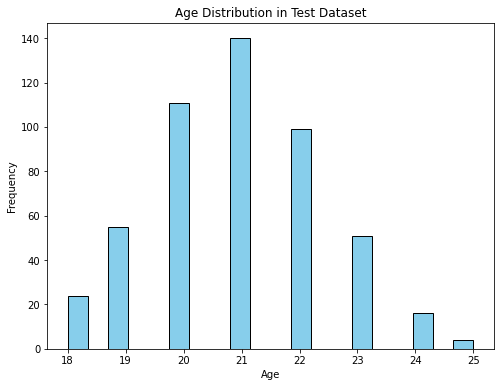

In [21]:
# Code to show Age Distribution in dataset
import matplotlib.pyplot as plt

# Create a histogram for the "Age" feature
plt.figure(figsize=(8, 6))
plt.hist(test_data["Age"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in Test Dataset")
plt.show()

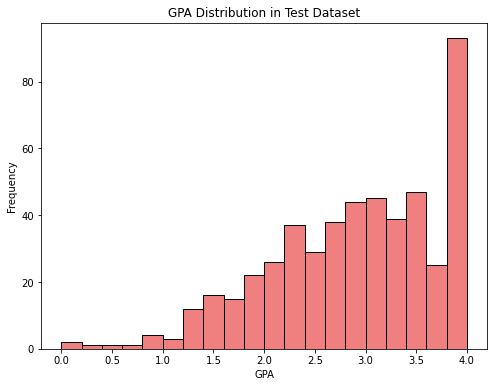

In [22]:
# Code to show GPA Distribution in dataset
plt.figure(figsize=(8, 6))
plt.hist(test_data["GPA"], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.title("GPA Distribution in Test Dataset")
plt.show()

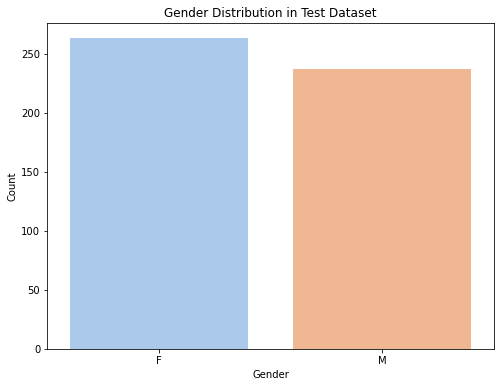

In [23]:
# Code that creates a count plot for the "Gender" feature
plt.figure(figsize=(8, 6))
sns.countplot(data=test_data, x="Gender", palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution in Test Dataset")
plt.show()

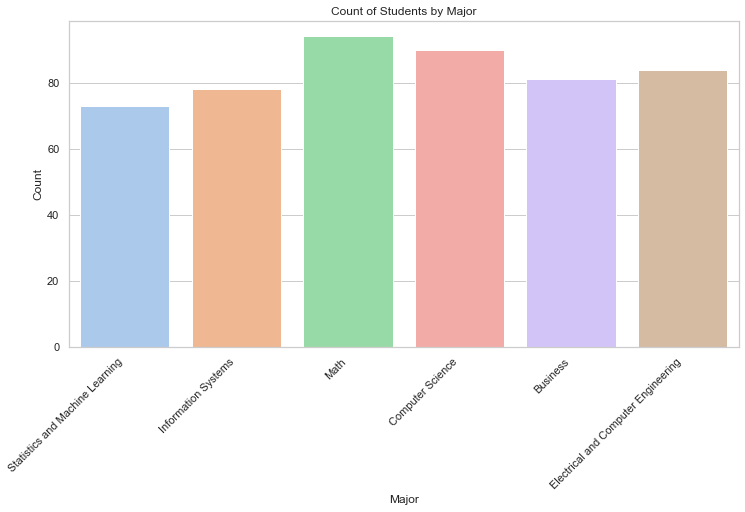

In [11]:
# Code to show Stident's Major Distribution in dataset
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(data=test_data, x="Major", palette="pastel")
plt.xticks(rotation=45, ha="right") 

plt.xlabel("Major")
plt.ylabel("Count")
plt.title("Count of Students by Major")
plt.show()

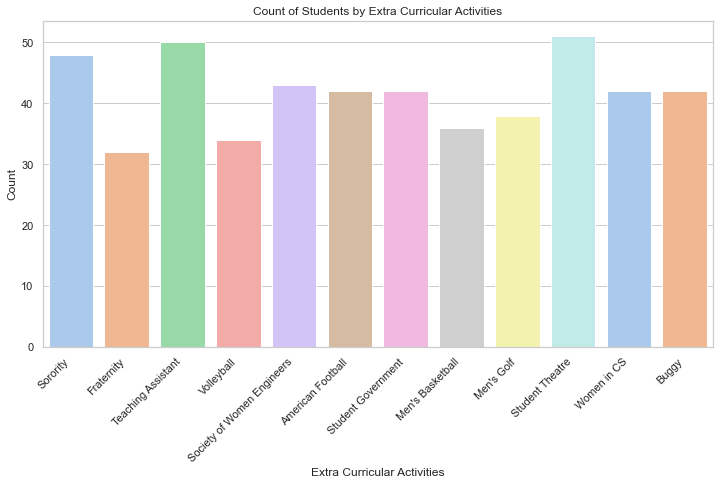

In [12]:
# Code to show Extra Curricular Activities Distribution in dataset
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(data=test_data, x="Extra Curricular", palette="pastel")
plt.xticks(rotation=45, ha="right") 

plt.xlabel("Extra Curricular Activities")
plt.ylabel("Count")
plt.title("Count of Students by Extra Curricular Activities")
plt.show()

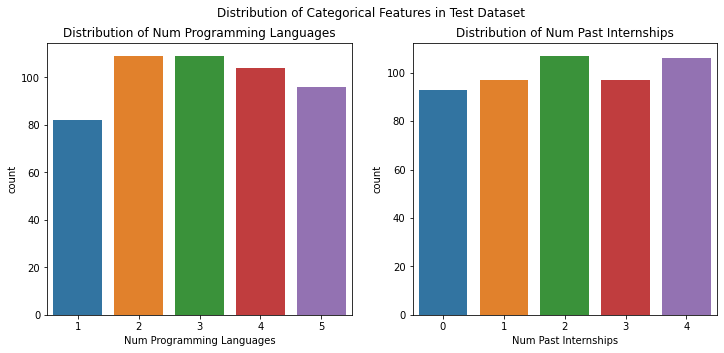

In [24]:
# Code to show Number of Programming Languages and Number of Past Internships Distribution in dataset
import seaborn as sns
import matplotlib.pyplot as plt


test_data_for_plotting = test_data.drop(columns=["Student ID"])

# Features to create count plots for
categorical_features = ["Num Programming Languages", "Num Past Internships"]

# Create subplots for count plots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(12, 5))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=test_data_for_plotting, x=feature, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

plt.suptitle("Distribution of Categorical Features in Test Dataset")
plt.show()

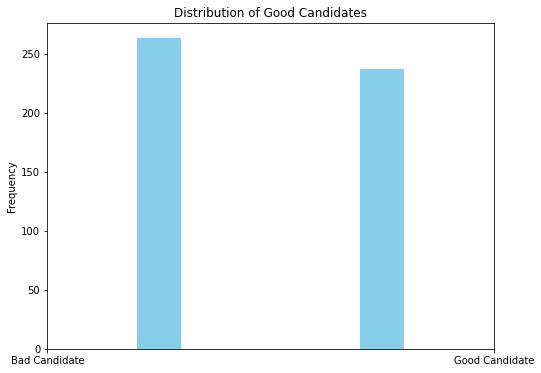

In [43]:
# Create a histogram for the "Good Candidate" feature

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(test_data_for_plotting["Good Candidate"], bins=[0, 0.5, 1], color="skyblue", rwidth=0.2)

plt.ylabel("Frequency")
plt.title("Distribution of Good Candidates")
plt.xticks([0, 1], labels=["Bad Candidate", "Good Candidate"])

plt.show()

In [7]:
# Predict the output of the test dataset using the model
import pydantic
from pydantic import ValidationError

correct_predictions = 0
total_predictions = 0

for student_data in test_data_dict:
    # Ensure "Student ID" is removed if it exists
    if 'Student ID' in student_data:
        del student_data['Student ID']

    # Check data types and convert to strings
    for key in student_data:
        if key not in ["Good Candidate"]:
            student_data[key] = str(student_data[key])

    try:
        # Validate the data before making predictions
        prediction_result = predict(student_data)
        predicted_value = prediction_result['good_employee']
        actual_value = student_data['Good Candidate']
        total_predictions += 1

        if predicted_value == actual_value:
            correct_predictions += 1
    except ValidationError as e:
        print(f"Validation Error: {e}")
        # Handle or log validation errors as needed

accuracy = correct_predictions / total_predictions
print(f"Model Accuracy: {accuracy * 100:.2f}%")




Model Accuracy: 83.20%


In [44]:
# Report the accuracy of the model, and the confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions
predictions = []
actuals = []

for student_data in test_data_dict:
    prediction_result = predict(student_data)
    predicted_value = prediction_result['good_employee']
    actual_value = student_data['Good Candidate']
    
    predictions.append(predicted_value)
    actuals.append(actual_value)

# Calculate accuracy
accuracy = accuracy_score(actuals, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(actuals, predictions)
print("Confusion Matrix:")
print(cm)


Model Accuracy: 83.20%
Confusion Matrix:
[[221  42]
 [ 42 195]]
